<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [213]:
# type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

#### Read the data

Load the csv file and print the first five observations.

In [121]:
# type your code here
fish = pd.read_csv("Fish.csv")
fish.head()

,Species,Weight,V_length,D_length,C_length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [122]:
fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

Our objective is to predict the weight of a fish.

**The data definition is as follows:** <br>

**Species:** Species of a fish

**Weight:** Weight of a fish (target/dependent variable)

**V_length:** Vertical length of a fish

**D_length:** Diagonal length of a fish

**C_length:** Cross length of a fish

**Height:** Height of a fish

**Width:** Diagonal width of a fish

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model on the scaled data and check whether the model is overfitting or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [123]:
fish = pd.get_dummies(fish,drop_first=True)
fish.head()

,Weight,V_length,D_length,C_length,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [124]:
fish.shape

(159, 12)

In [125]:
# type your code here
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
fishss = ss.fit_transform(fish)
fishs = pd.DataFrame(fish,columns=fish.columns)


In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
X = fishs.drop('Weight',axis=1)
y = fishs['Weight']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=44)
no_of_cols = 25
score_train = []
score_test = []
for n in range(no_of_cols):
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=n+1)
    rfe.fit(X_train,y_train)
    
    score = rfe.score(X_train, y_train)
    score_train.append(score)

    score2= rfe.score(X_test, y_test)
    score_test.append(score2)

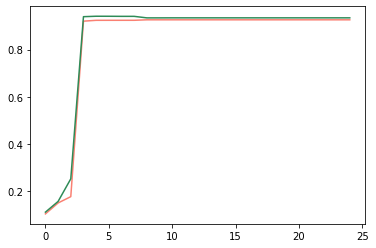

In [127]:
plt.plot(score_train, 'salmon')
plt.plot(score_test, 'seagreen')
plt.show()

In [190]:
from sklearn.model_selection import KFold, GridSearchCV

folds = KFold(n_splits=5, shuffle=True, random_state=4)

params = [{'n_features_to_select' : list(range(1,13))}]

lr = LinearRegression()
rfe = RFE(lr)

gsearch = GridSearchCV(rfe, param_grid = params, scoring='r2',return_train_score=True, cv=folds)
gsearch.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12]}],
             return_train_score=True, scoring='r2')

In [191]:
scores = cross_val_score(rfe, X, y, cv=5)
scores

array([-4.77857533,  0.11317821, -5.20002295,  0.82477109,  0.60179311])

In [192]:
gsearch.best_params_

{'n_features_to_select': 8}

In [131]:
cv_result = pd.DataFrame(gsearch.cv_results_).iloc[:,5:]
cv_result

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,{'n_features_to_select': 1},-0.149403,-0.009507,-0.084639,0.135654,-0.355170,-0.092613,0.162011,12,0.130695,0.137640,0.123700,0.086791,0.031918,0.102149,0.039261
1,{'n_features_to_select': 2},-0.005105,0.729651,-0.103192,0.195160,-0.238767,0.115549,0.338054,11,0.216187,0.858652,0.213673,0.133185,0.143602,0.313060,0.274956
2,{'n_features_to_select': 3},0.936176,0.724882,-0.140394,0.231923,-0.200890,0.310340,0.454793,10,0.926785,0.862475,0.261825,0.205098,0.231175,0.497472,0.325411
3,{'n_features_to_select': 4},0.943648,0.720031,0.874373,0.921826,0.905139,0.873004,0.079762,9,0.928043,0.868928,0.940466,0.931179,0.931047,0.919932,0.025841
4,{'n_features_to_select': 5},0.952195,0.753197,0.876403,0.922759,0.901611,0.881233,0.068690,8,0.929215,0.896604,0.943344,0.934530,0.933182,0.927375,0.016064
5,{'n_features_to_select': 6},0.952297,0.788911,0.873340,0.905273,0.906913,0.885347,0.054385,7,0.929491,0.901335,0.943994,0.936483,0.935515,0.929364,0.014753
6,{'n_features_to_select': 7},0.951984,0.895284,0.873235,0.904098,0.904710,0.905862,0.025722,3,0.929512,0.938519,0.944000,0.936627,0.935830,0.936898,0.004665
7,{'n_features_to_select': 8},0.951608,0.897224,0.873254,0.904018,0.905153,0.906251,0.025431,1,0.929534,0.939117,0.944001,0.936634,0.935846,0.937026,0.004705
8,{'n_features_to_select': 9},0.951621,0.901960,0.870389,0.901742,0.904737,0.906090,0.026021,2,0.930169,0.939524,0.945027,0.937498,0.935879,0.937619,0.004838
9,{'n_features_to_select': 10},0.949832,0.896718,0.862217,0.900383,0.906009,0.903032,0.027971,6,0.930264,0.940617,0.945531,0.937838,0.935940,0.938038,0.005053


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present in the scaled data?
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [132]:
# type your code here
X = fishs.drop('Weight',axis=1)
y = fishs['Weight']
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
vif_data

,feature,VIF
0,V_length,18095.288475
1,D_length,30522.367427
2,C_length,7960.777533
3,Height,235.486610
4,Width,182.874185
5,Species_Parkki,1.272513
6,Species_Perch,8.913123
7,Species_Pike,15.338391
8,Species_Roach,2.747195
9,Species_Smelt,1.840413


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Apply the ridge regression with 'alpha = 1.5' and compare the RMSE on the test dataset with the RMSE obtained from linear regression using OLS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [147]:
# type your code here
from sklearn.linear_model import Ridge, RidgeCV
X = fishs.drop('Weight',axis=1)
y = fishs['Weight']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=44)

ridge = Ridge(alpha=1.5)

ridge.fit(X,y)
pred = ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
print("RMSE Ridge : ", rmse)


RMSE Ridge :  98.0028563926042


In [144]:
import statsmodels.api as sm

Xc = sm.add_constant(X)
OLS_model = sm.OLS(y,Xc).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     194.7
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           9.67e-82
Time:                        14:58:47   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -907.1500    127.078     -7.139      0.000   -1158.285    -656.015
V_length            -79.3905     36.277     -2.188      0.030    -151.082      -7.699
D_length             83.5100     45.716      1.827      0.070      -6.835     173.856
C_length             28.0340     29.299      0.957      0.340     -29.867      85.935
Height                6.3568     13.055      0.487      0.627     -19.444      32.157
Width                -1.0454     23.912     -0.044      0.965     -48.301      46.210
Species_Parkki      157.1605     75.696      2.076      0.040       7.567     306.754
Species_Perch       129.2065    120.308      1.074      0.285    -108.551     366.964
Species_Pike       -209.6167    135.300     -1.549      0.123    -477.002      57.769
Species_Roach       106.7884     91.304      1.170      0.244     -73.650     287.227
Species_Smelt       438.3931    119.425      3.671      0.000     202.381     674.405
Species_Whitefish    89.2880     96.654      0.924      0.357    -101.722     280.298
==============================================================================
Omnibus:                       42.986   Durbin-Watson:                   0.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.736
Skew:                           1.170   Prob(JB):                     1.63e-21
Kurtosis:                       5.996   Cond. No.                     2.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
predicted = OLS_model.predict()

In [158]:
from statsmodels.tools.eval_measures import rmse

rmse(predicted,y,axis=0)

90.21305484788707

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a full model using SGD. Plot a multiple barchart to compare the beta coefficients for each variable obtained by the SGD model and the full model build using OLS 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [162]:
# type your code here

X = fishs.drop('Weight',axis=1)
y = fishs['Weight']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [202]:
# SkLearn SGD classifier
from sklearn.linear_model import SGDRegressor, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
n_iter=45
clf_ = SGDRegressor(max_iter=n_iter)
clf_.fit(X, y)
y_pred_sksgd=clf_.predict(x_test)

print('Mean Squared Error :',mean_squared_error(y_test, y_pred_sksgd))

Mean Squared Error : 5.298948437419355e+24


In [203]:
coef = OLS_model.params[1:]
coef

V_length             -79.390480
D_length              83.510047
C_length              28.033970
Height                 6.356798
Width                 -1.045415
Species_Parkki       157.160463
Species_Perch        129.206549
Species_Pike        -209.616742
Species_Roach        106.788415
Species_Smelt        438.393056
Species_Whitefish     89.288024
dtype: float64

In [204]:
sgd = clf_.coef_
sgd = pd.DataFrame(sgd,index=['V_length','D_length','C_length','Height','Width','Species_Parkki','Species_Perch','Species_Pike','Species_Roach','Species_Smelt','Species_Whitefish'])
sgd['coefficients_least_square'] = coef
sgd.rename(columns={0:'coefficients_sgd'},inplace=True)
sgd

,coefficients_sgd,coefficients_least_square
V_length,2.903824e+10,-79.390480
D_length,4.790969e+10,83.510047
C_length,3.770711e+09,28.033970
Height,-1.802643e+10,6.356798
Width,2.323272e+10,-1.045415
Species_Parkki,-3.300189e+10,157.160463
Species_Perch,-1.745879e+10,129.206549
Species_Pike,-1.319546e+10,-209.616742
Species_Roach,3.134800e+10,106.788415
Species_Smelt,6.144731e+09,438.393056


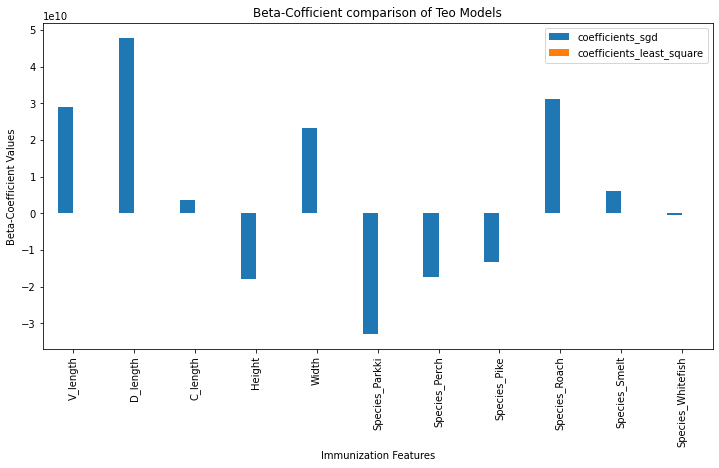

In [205]:
sgd.plot(kind='bar',figsize=(12,6))
plt.xlabel('Immunization Features')
plt.ylabel('Beta-Coefficient Values')
plt.title('Beta-Cofficient comparison of Teo Models')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the least significant variables in the data by considering 'alpha = 0.1' 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [232]:
# type your code here
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score
X = fishs.drop('Weight',axis=1)
y = fishs['Weight']
lasso = Lasso(alpha=0.1,max_iter=25000)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
r2_score(y_train, y_train_pred)

0.17147141295604673

In [233]:
pd.DataFrame(lasso.coef_, index = X.columns, columns=['coefs'])

,coefs
V_length,159.003083
D_length,-361.194370
C_length,241.025345
Height,-31.446799
Width,-220.945506
Species_Parkki,197.280900
Species_Perch,425.917543
Species_Pike,-410.874475
Species_Roach,186.790111
Species_Smelt,239.844522


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of diagonal width on the weight of a fish?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [223]:
# type your code here
X = fishs['Width']
y = fishs['Weight']
Xc = sm.add_constant(X)
OLS_2 = sm.OLS(y,Xc).fit()
OLS_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     579.0
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           1.52e-54
Time:                        16:41:15   Log-Likelihood:                -1036.9
No. Observations:                 159   AIC:                             2078.
Df Residuals:                     157   BIC:                             2084.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -430.7425     36.904    -11.672      0.000    -503.636    -357.849
Width        187.8925      7.808     24.063      0.000     172.470     203.315
==============================================================================
Omnibus:                      100.078   Durbin-Watson:                   0.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              635.292
Skew:                           2.298   Prob(JB):                    1.12e-138
Kurtosis:                      11.647   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Which value of alpha from the list of values returns lowest RMSE on the test set in ridge regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.00001, 0.001, 0.1, 10, 100]
    
Consider 5-fold cross validation.

In [245]:
# type your code here


X = fishs.drop('Weight',axis=1)
y = fishs['Weight']

from sklearn.linear_model import RidgeCV 
alphas = [0.0001, 0.001, 0.01, 0.1, 1]

ridge_cv = RidgeCV(alphas=alphas, cv=3)

ridge_cv.fit(X,y)

RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]), cv=3)

In [246]:
ridge_cv.alpha_

1.0

In [248]:
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
r2_score(y_train, y_train_pred)

0.1544116088708546

In [249]:
y_test_pred = ridge.predict(X_test)
r2_score(y_test, y_test_pred)

-0.1158410849990339

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Select the best value for the elastic net mixing parameter from the list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the below list of values:

    list_of_parameter = [0.0001, 0.001, 0.01, 0.1, 1]

Consider 5-fold cross validation.

In [239]:
# type your code here
from sklearn.linear_model import ElasticNetCV 
alphas = [0.0001, 0.001, 0.01, 0.1, 1]

enet_cv = ElasticNetCV(max_iter=50000,alphas=alphas, cv=3)

enet_cv.fit(X,y)

ElasticNetCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1], cv=3, max_iter=50000)

In [241]:
enet= ElasticNet(alpha=enet_cv.alpha_, max_iter=5000)
enet.fit(X_train,y_train)

y_train_pred = enet.predict(X_train)
r2_score(y_train, y_train_pred)

0.053596745160448545

In [251]:
y_test_pred = enet.predict(X_test)
r2_score(y_test, y_test_pred)

-0.045736581518504016

In [261]:
print("Best Alpha : ", enet_cv.alpha_)

Best Alpha :  1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the best value of alpha from the list of values for lasso regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.0001, 0.001, 0.1, 1, 2, 3]
    
Consider 5-fold cross validation.

In [254]:
alphas = [0.0001, 0.001, 0.1, 1, 2, 3]

lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=4, max_iter=35000, verbose=0)

lasso_cv.fit(X,y)

LassoCV(alphas=[0.0001, 0.001, 0.1, 1, 2, 3], cv=3, max_iter=35000,
        random_state=4, verbose=0)

In [257]:
# type your code here
lasso = Lasso(alpha=lasso_cv.alpha_, max_iter=35000)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
r2_score(y_train, y_train_pred)

0.14130651912187275

In [259]:
y_test_pred = lasso.predict(X_test)
r2_score(y_test, y_test_pred)

-0.09123092648944997

In [260]:
print("Best Value of Alpha : ", lasso_cv.alpha_)

Best Value of Alpha :  3.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build the elastic net regression model with 'alpha = 0.1' and best l1_ratio obtained by the GridSearchCV method. Also, compute the RMSE for test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [267]:
# type your code here
enet= ElasticNet(alpha=0.1, max_iter=5000)
enet.fit(X_train,y_train)

y_train_pred = enet.predict(X_train)

print("RMSE Elastic Net : ", np.sqrt(mean_squared_error(y_test,pred)))

RMSE Elastic Net :  502.43525907773767
